## importing libraries 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## data preprocessing 

### training image preprocessing

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y, in training_set:
    print(x, x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[191.25 183.25 181.25]
   [185.75 177.75 175.75]
   [193.75 185.75 183.75]
   ...
   [215.75 209.75 213.75]
   [211.   205.   209.  ]
   [218.   212.   216.  ]]

  [[189.5  181.5  179.5 ]
   [183.75 175.75 173.75]
   [191.25 183.25 181.25]
   ...
   [213.75 207.75 211.75]
   [217.   211.   215.  ]
   [213.   207.   211.  ]]

  [[187.   179.   177.  ]
   [190.   182.   180.  ]
   [193.5  185.5  183.5 ]
   ...
   [216.5  210.5  214.5 ]
   [215.   209.   213.  ]
   [222.5  216.5  220.5 ]]

  ...

  [[191.25 182.25 187.25]
   [191.   182.   187.  ]
   [195.25 186.25 191.25]
   ...
   [208.25 202.25 206.25]
   [204.5  198.5  202.5 ]
   [205.   199.   203.  ]]

  [[191.5  182.5  187.5 ]
   [197.25 188.25 193.25]
   [189.75 180.75 185.75]
   ...
   [209.75 203.75 207.75]
   [204.   198.   202.  ]
   [209.   203.   207.  ]]

  [[189.   180.   185.  ]
   [189.75 180.75 185.75]
   [190.25 181.25 186.25]
   ...
   [209.25 203.25 207.25]
   [209.75 203.75 207.75]
   [204.   198.   20

### to avoid overshooting
1. choose small learning rate default 0.001 we are taking 0.0001
2. there may be chance of underfitting , so increase number of neuron
3. add more convolution layer to extract more featur from images there may be possibility that model unable to capture relavent feature or model is confusing and lack of feaure so feed with more feature

## building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## building convolution layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #to avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
# output layer
model.add(Dense(units=38,activation='softmax'))

### compiling model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### model training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2583s 1s/step - loss: 1.3698 - accuracy: 0.5985 - val_loss: 0.4731 - val_accuracy: 0.8519
Epoch 2/10
2197/2197 [==============================] - 2577s 1s/step - loss: 0.4441 - accuracy: 0.8608 - val_loss: 0.3016 - val_accuracy: 0.9026
Epoch 3/10
2197/2197 [==============================] - 2727s 1s/step - loss: 0.2642 - accuracy: 0.9156 - val_loss: 0.2000 - val_accuracy: 0.9336
Epoch 4/10
2197/2197 [==============================] - 3739s 2s/step - loss: 0.1801 - accuracy: 0.9412 - val_loss: 0.1630 - val_accuracy: 0.9468
Epoch 5/10
2197/2197 [==============================] - 2600s 1s/step - loss: 0.1349 - accuracy: 0.9563 - val_loss: 0.1542 - val_accuracy: 0.9510
Epoch 6/10
2197/2197 [==============================] - 2600s 1s/step - loss: 0.1034 - accuracy: 0.9660 - val_loss: 0.1265 - val_accuracy: 0.9609
Epoch 7/10
2197/2197 [==============================] - 2713s 1s/step - loss: 0.0851 - accuracy: 0.9714 - val_loss: 0.1371 -

## Model Evaluation

In [24]:
# MODEL EVALUATION ON TRAINING SET
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 4219s 2s/step - loss: 0.0291 - accuracy: 0.9908


In [25]:
print(train_loss, train_acc)

0.029095914214849472 0.9907674789428711


In [26]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 213s 386ms/step - loss: 0.1211 - accuracy: 0.9663


In [27]:
print(val_loss, val_acc)

0.12109746038913727 0.9662531018257141


## saving model

In [28]:
model.save("trained_model.h5")

In [29]:
model.save("trained_model.keras")

In [ ]:
training_history.history

In [33]:
# RECORDING history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## accuracy visualization

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.show()

### some other matrix for model evaluation

In [21]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [22]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [23]:
y_pred = model.predict(test_set)

550/550 [==============================] - 968s 2s/step


In [24]:
y_pred,y_pred.shape

(array([[0.00444799, 0.06072808, 0.03509002, ..., 0.01243465, 0.00518893,
         0.01009706],
        [0.00785093, 0.0571269 , 0.03120527, ..., 0.0102337 , 0.00746921,
         0.0081589 ],
        [0.00507707, 0.06391758, 0.03077497, ..., 0.01216862, 0.00516226,
         0.00899555],
        ...,
        [0.00567459, 0.06621303, 0.03215125, ..., 0.0106382 , 0.00779238,
         0.00864115],
        [0.00618635, 0.05337806, 0.03146163, ..., 0.01118026, 0.00776466,
         0.00922369],
        [0.00216225, 0.08497652, 0.03025681, ..., 0.00518541, 0.00237766,
         0.00407135]], dtype=float32),
 (17572, 38))

In [25]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [26]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([21,  3, 21, ..., 21, 21,  3], dtype=int64)>

In [27]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [28]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_true, predicted_categories, target_names=class_name, zero_division=1))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       1.00      0.00      0.00       440
                                   Apple___healthy       0.02      0.11      0.04       502
                               Blueberry___healthy       0.06      0.05      0.05       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       1.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       1.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.00      0.

In [31]:
cn = confusion_matrix(y_true,predicted_categories)
cn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
### confusion matrix visuali

<function matplotlib.pyplot.show(close=None, block=None)>

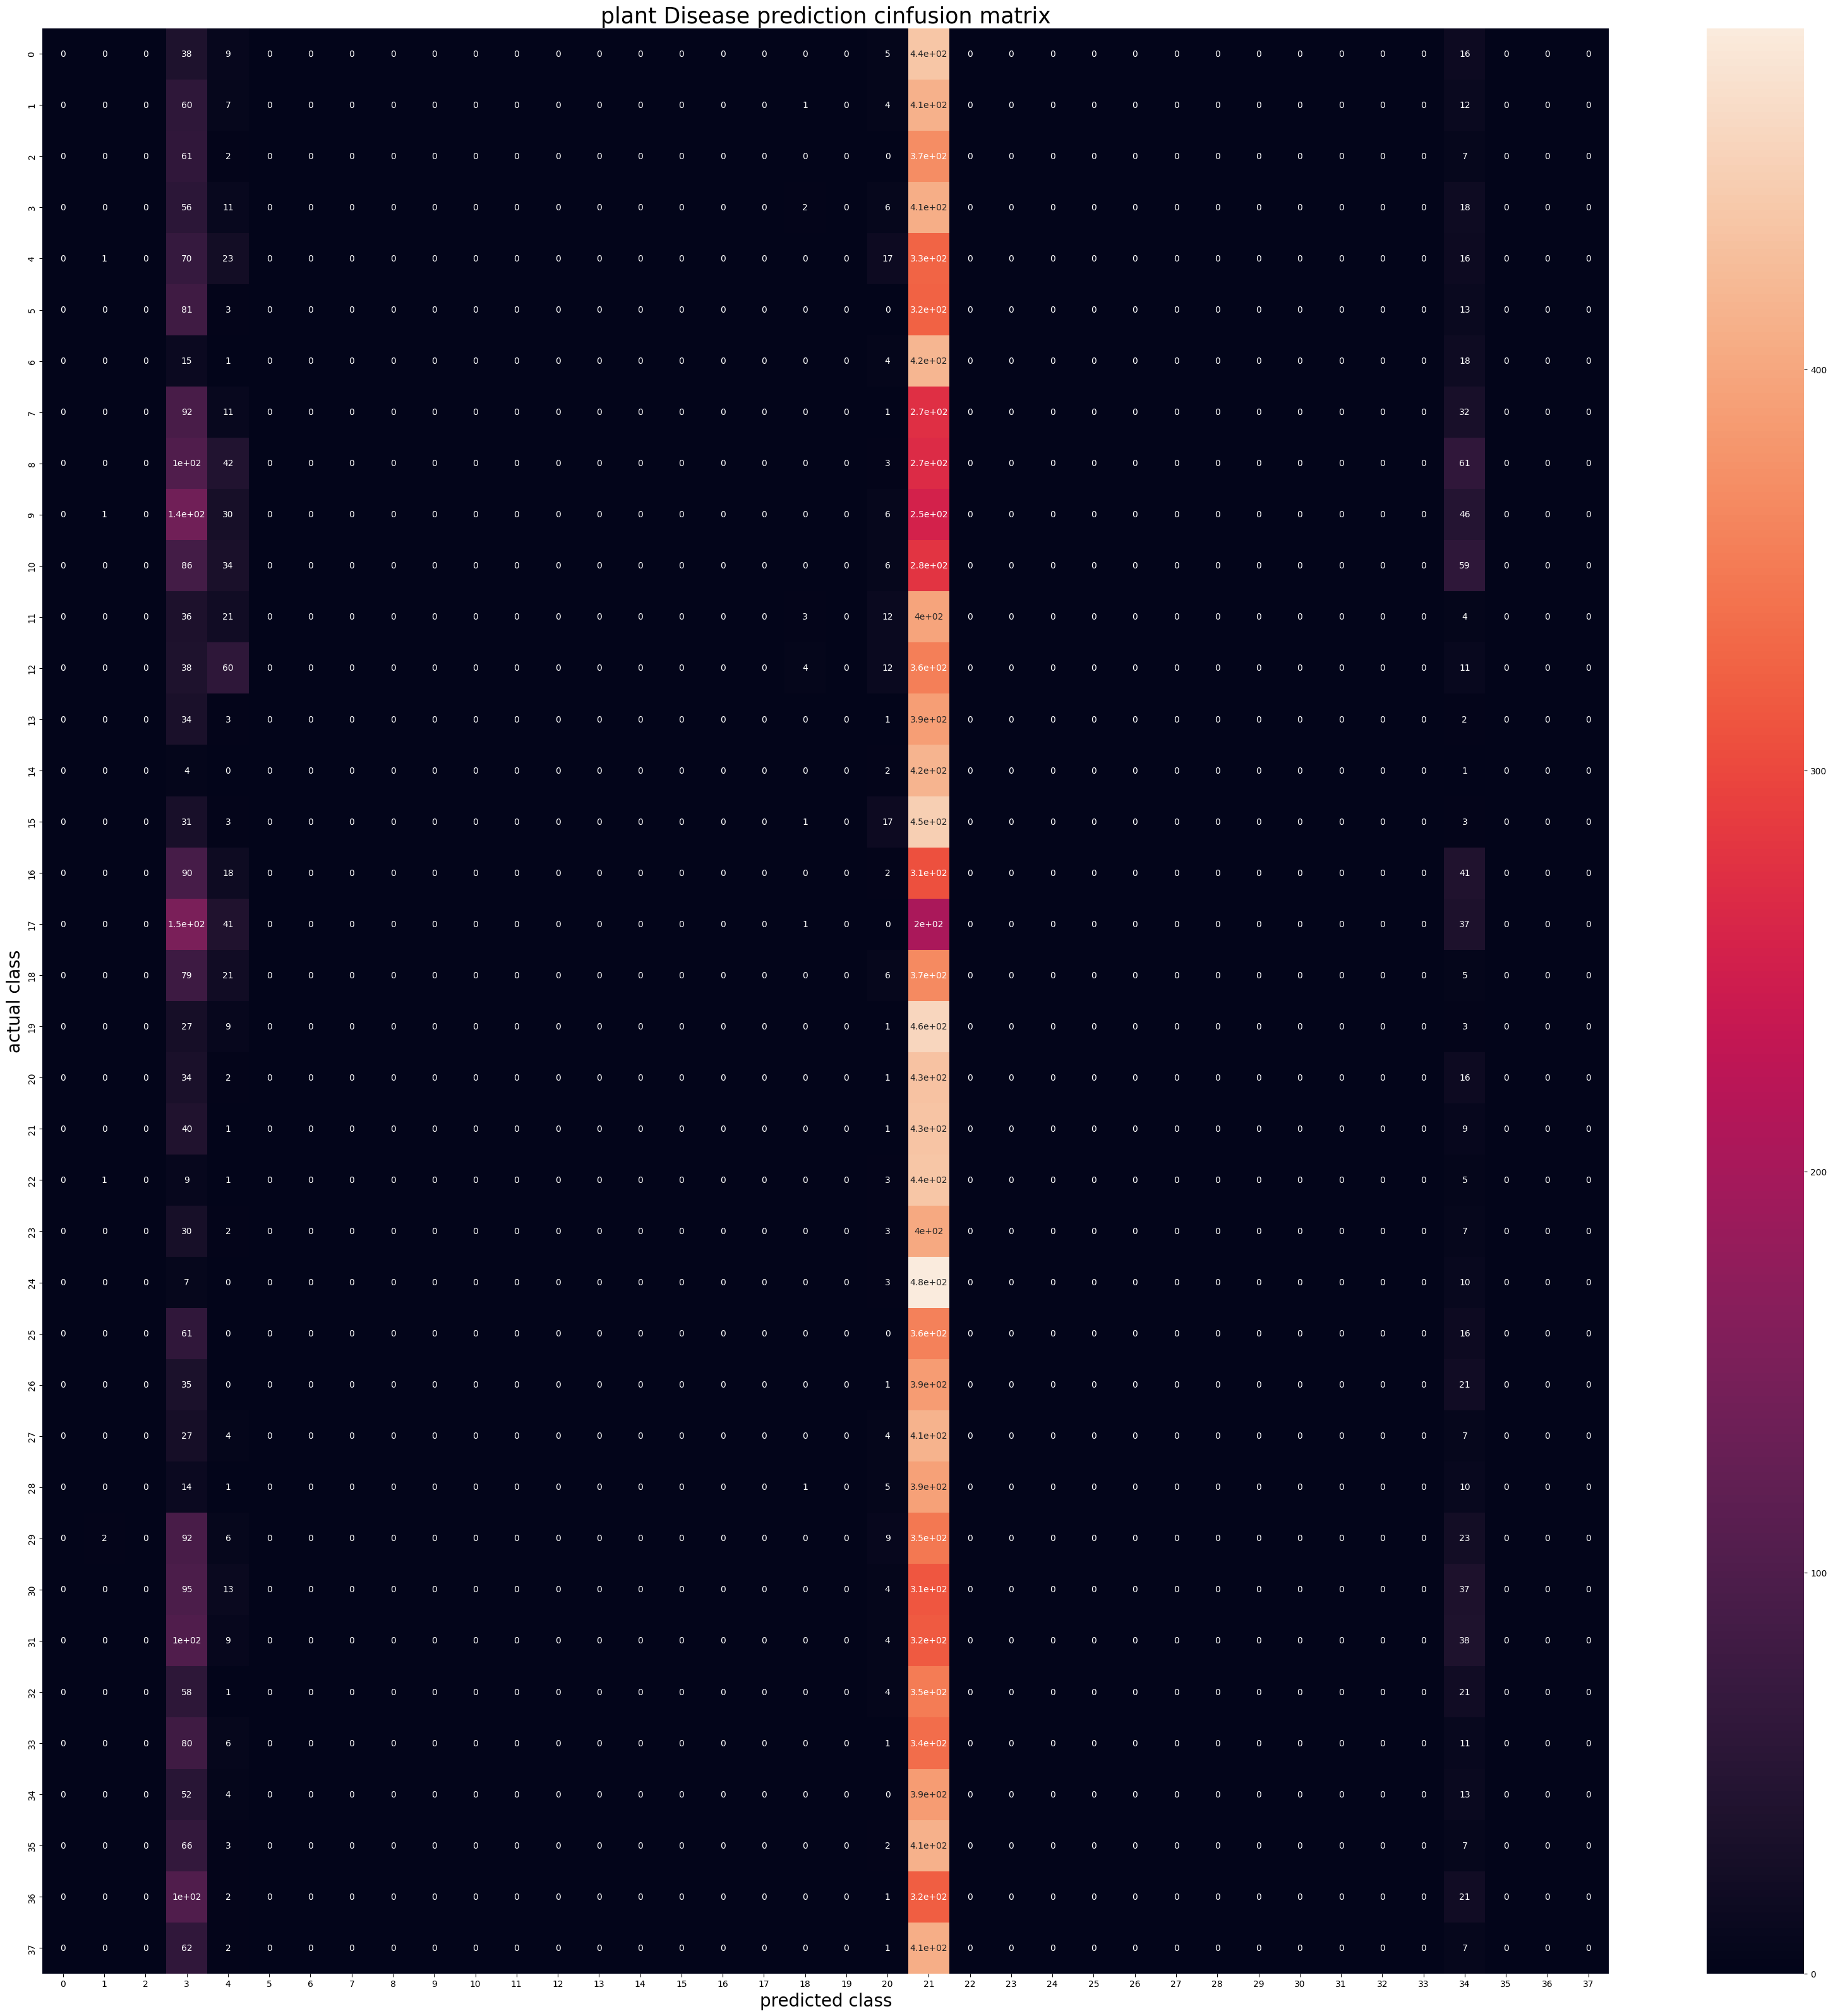

In [32]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class", fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("plant Disease prediction cinfusion matrix",fontsize=25)
plt.show